In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def plot_gp(mu, cov, X, samples=[]):
    X = X.reshape(-1)
    mu = mu.reshape(-1)

    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu+ uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label="Mean")

    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls="--", label='sample_{}'.format(i))
    plt.legend()

In [3]:
def gaussian_rbf(x1, x2, l=1, sigma_f=1):
    # distance between each rows
    dist_matrix = np.sum(np.square(x1), axis=1).reshape(-1, 1) + np.sum(np.square(x2), axis=1) - 2 * np.dot(x1, x2.T)
    return np.square(sigma_f) * np.exp(-1 / (2 * np.square(l)) * dist_matrix)

In [4]:
kernel = gaussian_rbf

In [5]:
# prior 

X = np.arange(-5, 5, 0.2 ).reshape(-1, 1)
X.shape

(50, 1)

In [6]:
mu = np.zeros(X.shape)
cov = kernel(X, X)
samples = np.random.multivariate_normal(mu.reshape(-1), cov, 4)
cov

array([[1.00000000e+00, 9.80198673e-01, 9.23116346e-01, ...,
        6.49934797e-20, 9.72098502e-21, 1.39694394e-21],
       [9.80198673e-01, 1.00000000e+00, 9.80198673e-01, ...,
        4.17501006e-19, 6.49934797e-20, 9.72098502e-21],
       [9.23116346e-01, 9.80198673e-01, 1.00000000e+00, ...,
        2.57675711e-18, 4.17501006e-19, 6.49934797e-20],
       ...,
       [6.49934797e-20, 4.17501006e-19, 2.57675711e-18, ...,
        1.00000000e+00, 9.80198673e-01, 9.23116346e-01],
       [9.72098502e-21, 6.49934797e-20, 4.17501006e-19, ...,
        9.80198673e-01, 1.00000000e+00, 9.80198673e-01],
       [1.39694394e-21, 9.72098502e-21, 6.49934797e-20, ...,
        9.23116346e-01, 9.80198673e-01, 1.00000000e+00]])

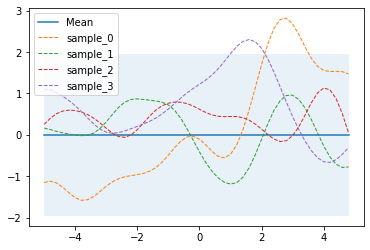

In [7]:
plot_gp(mu, cov, X, samples)

In [8]:
def posterior_predictive(X, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K = kernel(X_train, X_train, l, sigma_f) + np.square(sigma_y) * np.eye(len(X_train))
    K_s = kernel(X_train, X, l, sigma_f)
    K_ss = kernel(X, X, l, sigma_f)

    K_inv = np.linalg.inv(K)

    mu_s = K_s.T @ K_inv @ Y_train
    cov_s = K_ss - K_s.T @ K_inv @ K_s

    return mu_s, cov_s

In [9]:
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = np.random.multivariate_normal(mu_s.reshape(-1), cov_s, 5)
mu_s.shape

(50, 1)

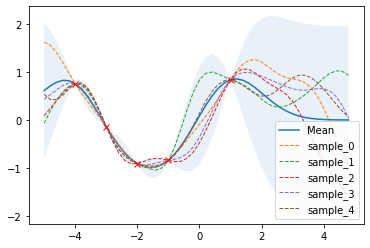

In [10]:
plot_gp(mu_s, cov_s, X, samples)
plt.plot(X_train, Y_train, 'rx')

In [11]:
X.shape

(50, 1)

In [12]:

X.shape, mu_s.shape, cov_s.shape

((50, 1), (50, 1), (50, 50))

In [13]:
X_train, Y_train

(array([[-4],
        [-3],
        [-2],
        [-1],
        [ 1]]),
 array([[ 0.7568025 ],
        [-0.14112001],
        [-0.90929743],
        [-0.84147098],
        [ 0.84147098]]))

In [14]:
mu.shape

(50, 1)

In [15]:
np.random.multivariate_normal([10,2], [[1,0],[0,1]])

array([12.09248155,  3.54178878])

/var/folders/28/jy8_vfjd7kn3d7khbpw4vjqh0000gn/T/ipykernel_4767/4026576647.py:45: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


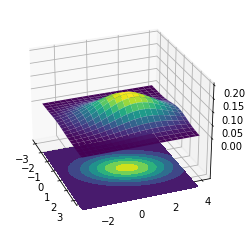

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. ,0.5], [0.5,  3]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

